#  Grafos y redes de transporte

## Clase 4: Análisis y construcción de una red.

### Una aproximación a la teoría de grafos

![informacion](../imagenes/grafos_introduccion.png)

## Introducción 

Con esta clase, abrimos un nuevo capítulo. En el transcurso de este módulo nos dedicaremos exclusivamente a recorrer un conjunto de conceptos que hacen al trabajo y análisis con redes de transporte. Para ello, tomaremos un caso de estudio y lo utilizaremos como base para aplicar los fundamentos principales de la teoría de grafos. 

Nos apoyaremos en sus nociones básicas para describir el funcionamiento de una red de transporte, apelando también a librerías desarrolladas en python para el manejo de información estructurada en nodos conectados por una serie de arcos. 

Revisaremos las distintas métricas de una red para evaluar el alcance territorial de un sistema de transporte, su accesibilidad, las franjas horarias de mayor uso, entre otras.

Así es que llegamos a la **propuesta para esta clase**. Nos descargaremos los [datasets de recorridos realizados](https://data.buenosaires.gob.ar/dataset/bicicletas-publicas) en la red de bicicletas públicas de la Ciudad de Buenos Aires (no te olvides de poner los archivos en la carpeta `data`), estructuraremos un grafo donde las estaciones serán los nodos y y los viajes los arcos que los conectan. 

**Esto lo desarrollaremos en X partes o secciones**:
**1)** *Titulo*
**2)** *Titulo*

Pero antes, comencemos por construir una descripcíón más general de nuestro objeto de estudio. ¿Qué cantidad de usuarios tiene la red de bicicletas públicas? ¿Quiénes son los usuarios más frecuentes? ¿En qué momento del día se usa más el servicio?¿Qué zonas de la ciudad conecta?...arremanguemonos y exploremos nuestros datos!

### Ecobici, la red de bicicletas públicas

![informacion](../imagenes/ecobici.png)

In [1]:
# Importamos numpy y pandas para manipular nuestros datos
import pandas as pd
import numpy as np

Los datasets que están disponibles, van del año 2015 al 2019, para no tener que cargar uno por uno, usemos un diccionario y carguemos todos los df de una sola vez. No son datasets livianos, por lo que pueden tardar unos segundos.

In [2]:
# construyamos el path de cada uno en base al año
paths = ['../data/bici{}_cdn.csv'.format(str(y)) for y in range(15,20)]

# y guardemos cada df bajo una key
df = {}
for p in paths:
    df[p[12:14]] = pd.read_csv(p)

In [3]:
# Por ejemplo, nuestro primer año de la serie, 2015...
df['15'].head()

bici_id_usuario bici_Fecha_hora_retiro  bici_tiempo_uso  \
0         134224.0    2015-12-31 20:30:05             14.0   
1         134224.0    2015-12-31 19:58:37             25.0   
2         222555.0    2015-12-31 18:42:54             57.0   
3          11504.0    2015-12-31 17:55:29             15.0   
4         183241.0    2015-12-31 16:59:29             24.0   

  bici_nombre_estacion_origen  bici_estacion_origen  \
0                      Aduana                     3   
1                      Retiro                     2   
2                    Congreso                     8   
3               Plaza Almagro                    17   
4               Plaza Almagro                    17   

  bici_nombre_estacion_destino  bici_estacion_destino  bici_sexo  bici_edad  
0                   Tribunales                   11.0  MASCULINO       71.0  
1                       Aduana                    3.0  MASCULINO       71.0  
2                       Retiro                    2.0  MASCULINO       26.0  
3                     Congreso                    8.0  MASCULINO       26.0  
4                Plaza Almagro                   17.0   FEMENINO       59.0

In [4]:
# Un poco de información adicional
df['15'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503867 entries, 0 to 503866
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bici_id_usuario               503867 non-null  float64
 1   bici_Fecha_hora_retiro        503867 non-null  object 
 2   bici_tiempo_uso               495440 non-null  float64
 3   bici_nombre_estacion_origen   503867 non-null  object 
 4   bici_estacion_origen          503867 non-null  int64  
 5   bici_nombre_estacion_destino  495440 non-null  object 
 6   bici_estacion_destino         495440 non-null  float64
 7   bici_sexo                     503867 non-null  object 
 8   bici_edad                     503867 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 34.6+ MB


Ahora hagamos algunos gráficos para entender con qué estamos trabajando, por ejemplo...cuál es la edad de los usuarios del sistema de ecobici?

In [5]:
# Importamos algunas librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a apelar al método `subplot` de matplotlib para dividir la pantalla en filas y columnas y poder ver cada años por separado. Si hacen `Shift`+`tab` * 2 adentro del método verán que cuentan con una breve descripción.

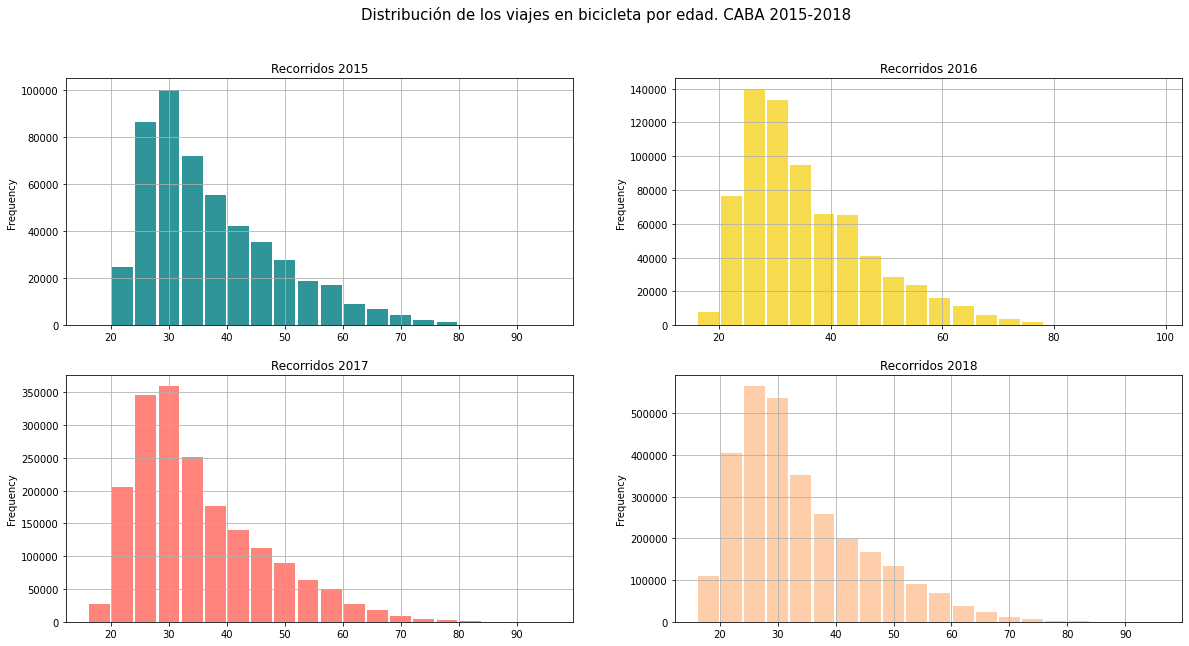

In [6]:
# Graficamos un histograma por año para ver cantidad de casos por edad
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
viajes15 = df['15'].bici_edad
viajes15.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#2F9599')
plt.title('Recorridos 2015')

plt.subplot(2,2,2)
viajes16 = df['16'].bici_edad
viajes16.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#F7DB4F')
plt.title('Recorridos 2016')

plt.subplot(2,2,3)
viajes17 = df['17'].bici_edad
viajes17.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FF847C')
plt.title('Recorridos 2017')

plt.subplot(2,2,4)
viajes18 = df['18'].bici_edad
viajes18.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FECEAB')
plt.title('Recorridos 2018')

plt.suptitle('Distribución de los viajes en bicicleta por edad. CABA 2015-2018', fontsize=15);

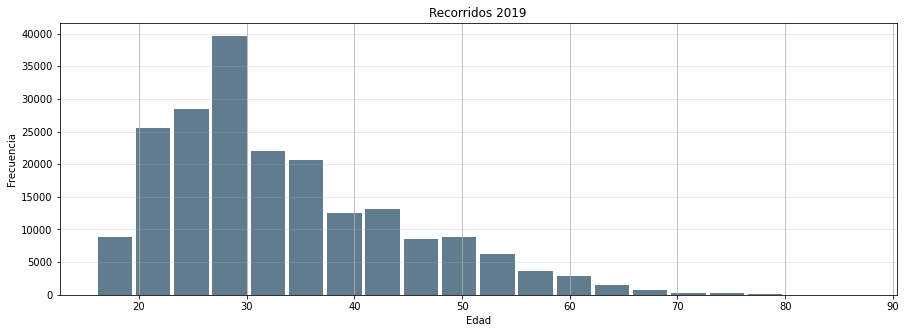

In [7]:
# ... y ahora el último año disponible
viajes19 = df['19'].bici_edad
viajes19.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(15,5))
plt.title('Recorridos 2019')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3);

Un patrón que podemos ver en todos los años es una distribución con un claro sesgo a la izquierda. Es decir, que estamos frente a un medio de movilidad donde el usuario frecuente suele estar en torno a los 30 años de edad. Y qué pasa con el género?

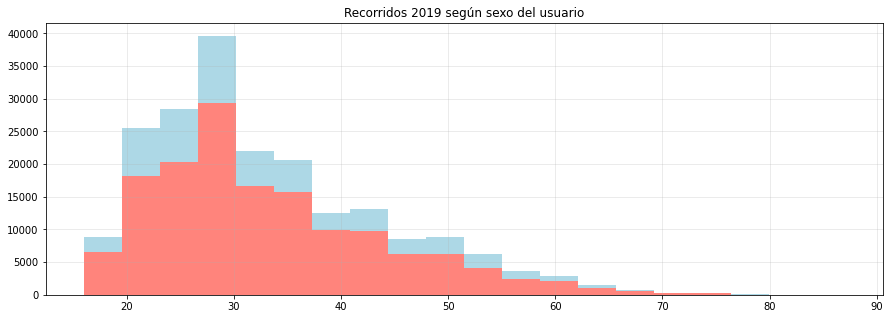

In [8]:
# Diferencias de uso por genero (2019)
edad = df['19'].bici_edad
sexo = df['19'].bici_sexo

plt.figure(figsize=(15,5))
plt.hist([[e for e, s in zip(edad, sexo) if s=='MASCULINO'], 
          [e for e, s in zip(edad, sexo) if s=='FEMENINO']], 
          color=['#FF847C','#ADD8E6'], bins=20, stacked=True)
plt.grid(alpha=0.3)
plt.title('Recorridos 2019 según sexo del usuario')
plt.show();

Lo que podemos ver ahora es que, al menos para el año 2019 los usuarios son mayormente hombres. Se animan a comprobar si este patrón se reproduce en otros años? Construyamos algunos gráficos de torta para ver la distribución porcentual de casos por año, entre hombres y mujeres.

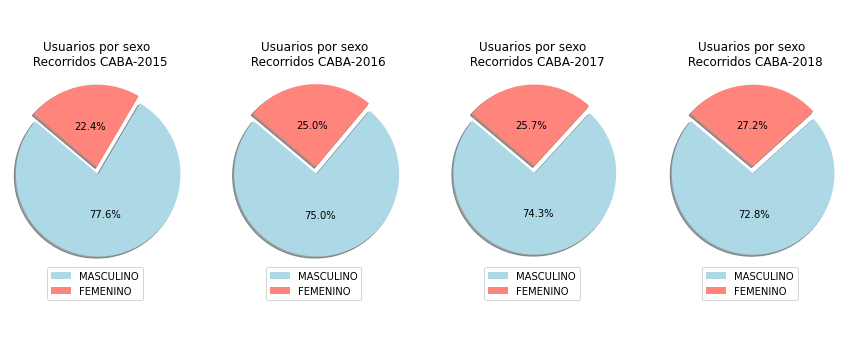

In [9]:
# Estilos
explode = (0.09, 0) 
colors = ['#ADD8E6', '#FF847C']
labels = ['MASCULINO', 'FEMENINO']


# Plot 1
sizes = [df['15'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
         df['15'].groupby(['bici_sexo'])['bici_edad'].count()[0]]

# Plot 2
sizes2 = [df['16'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['16'].groupby(['bici_sexo'])['bici_edad'].count()[0]]

# Plot 3
sizes3 = [df['17'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['17'].groupby(['bici_sexo'])['bici_edad'].count()[0]] 

# Plot 4
sizes4 = [df['18'].groupby(['bici_sexo'])['bici_edad'].count()[1], 
          df['18'].groupby(['bici_sexo'])['bici_edad'].count()[0]]
 
# Grilla de plots
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
plt.pie(sizes, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
 
plt.legend(labels, loc=(0.22,0.1))
plt.axis('equal')
plt.title('Usuarios por sexo \n Recorridos CABA-2015', y=0.8)

plt.subplot(1,4,2)
plt.pie(sizes2, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2016', y=0.8)
plt.axis('equal')

plt.subplot(1,4,3)
plt.pie(sizes3, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2017', y=0.8)
plt.axis('equal')

plt.subplot(1,4,4)
plt.pie(sizes4, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2018', y=0.8)
plt.axis('equal')
plt.show();

Esta es otra forma de constatar lo que vimos en nuestros histogramas. Cuando tenemos pocas categorías, los gráficos de torta también son una buena alternativa para ver cómo se distribuyen los valores de una variable. Hasta ahora, sabemos que la mayoría de los usuarios son varones jóvenes.

Y...¿en qué momento del día es cuando más se utiliza el servicio? Por defecto, los datos de tipo fecha no son trabajados como tales. Para ello, python requiere del módulo `datetime`. Este, nos sólo reconoce los dtypes de tipo fecha sino que también nos permite realizar cualquier tipo de operación con ellos. Desde obtener el mes, hasta el día de la semana. Veamos algunos ejemplos rápidos usando funciones regulares.

In [10]:
from datetime import datetime

In [11]:
# Función para devolver columna de fecha y hora
def fecha_hora(df):
    '''
    Separa la informacion de fecha y hora que en todos los df estan juntas como string
    
    Argumentos
    ----------
    
    df: el dataframe de cada año de recorridos de bicis
    '''
    
    # Se splitea la columna en dos: fecha y hora que en todos los df estan juntas como str
    fecha_hora = df['bici_Fecha_hora_retiro'].str.split(' ', expand=True)
    
    # Se almacena en un nuevo df
    fecha_hora.columns = ['Fecha','Hora']
    
    return fecha_hora

In [12]:
fecha_hora(df['18'])

Fecha      Hora
0        2018-12-31  23:56:42
1        2018-12-31  23:40:14
2        2018-12-31  23:31:39
3        2018-12-31  23:27:19
4        2018-12-31  23:22:29
...             ...       ...
2970474  2018-01-01  00:20:31
2970475  2018-01-01  00:20:22
2970476  2018-01-01  00:20:14
2970477  2018-01-01  00:18:05
2970478  2018-01-01  00:08:05

[2970479 rows x 2 columns]

In [13]:
# Función para devolver dia de la semana
def obtener_dia_semana(fecha):
    '''
    Devuelve el dia de la semana a partir de la fecha
    
    Argumentos
    ----------
    
    fecha: columna del df, para usarla hay que mapearla porque strptime no toma series 
    '''
    return datetime.strptime(fecha,'%Y-%m-%d').weekday()

Veamos cómo podríamos aplicar ambas funciones. Inicialmente podríamos...

In [14]:
# 1) instanciar las columnas de fecha y hora 
tiempo19 = fecha_hora(df['19'])

# 2) y a partir de la Fecha obtener el dia de la semana mapeando la última función
dia19 = tiempo19.Fecha.map(obtener_dia_semana)

In [15]:
dia19

0         4
1         4
2         4
3         4
4         4
         ..
204102    1
204103    1
204104    1
204105    1
204106    1
Name: Fecha, Length: 204107, dtype: int64

In [16]:
# Podemos crear una copia de nuestro dataframe para seguir trabajando sobre un objeto nuevo
df19b = df['19'].copy()

In [17]:
# Creamos una función para acomodar un poco más nuestra información y mostrar el día de la semana
def nombre_dia(serie):
    '''
     Reemplaza numero de dia por nombre
    
    Argumentos
    ----------
    serie: pd.Series()
    '''
    dia = serie.replace({0:'lunes', 
                         1:'martes', 
                         2:'miercoles', 
                         3:'jueves', 
                         4:'viernes', 
                         5:'sabado', 
                         6:'domingo'})
    return dia

In [18]:
# Dias de la semana
df19b['dia_semana'] = nombre_dia(dia19)

In [19]:
# Hora del dia
df19b['hora_dia'] = tiempo19.Hora

In [20]:
# convertimos el tipo object a datetime para tener la hora separada
df19b['hora'] = pd.to_datetime(df19b['hora_dia']).dt.hour

Ahora, en base a esta información podemos clasificar los distintos momentos del día y así construir una variable categórica que nos simplifique un poco la manera de visualizar nuestros datos.

In [21]:
# Funcion para clasificar el momento del dia en base a horarios
def momento_dia(x):
    '''
     Clasifica momentos del día según un horario predefinido.
    
     Argumentos
     ----------
     x: str
    '''
    
    if (x['hora_dia']>= '07:00:00') & (x['hora_dia']<= '11:30:00'):
        return '1.Mañana'
    
    elif (x['hora_dia']>='11:30:00') & (x['hora_dia'] <= '14:30:00'):
        return '2.Mediodia'
    
    elif (x['hora_dia']>'14:30:00') & (x['hora_dia'] < '17:00:00'):
        return '3.Media tarde'
    
    elif (x['hora_dia']>='17:00:00') & (x['hora_dia'] <= '19:00:00'):
        return '4.Tarde'
    
    elif (x['hora_dia']>'19:00:00') & (x['hora_dia'] <= '21:00:00'):
        return '5.Tarde noche'
    
    elif (x['hora_dia']>'21:00:00') & (x['hora_dia'] <= '24:00:00'):
        return '6.Noche'
    
    elif (x['hora_dia']>'24:00:00') & (x['hora_dia'] < '07:00:00'):
        return '7.Madrugada'

Este es un buen ejemplo de cómo aplicar una función regular a partir de una anónima. Fíjense que lo que estamos pasando como argumento (nuestra `x`) no es otra cosa que cada fila de nuestra serie:

In [22]:
# aplicamos nuestra función regular con otra anónima
momento_dia = df19b.apply(lambda x: momento_dia(x),1)

In [23]:
df19b['momento_dia'] = momento_dia

Veamos ahora de qué manera podemos visualizar esta nueva información, por ejemplo, veamos la cantidad de varones y mujeres en los distintos momentos del día...

In [24]:
# Agrupamos la cantidad de casos
sexo_dia = df19b.groupby(['momento_dia','bici_sexo'])[['bici_sexo']].count()

In [25]:
sexo_dia.columns = ['Cantidad']

In [26]:
sexo_dia = sexo_dia.reset_index()

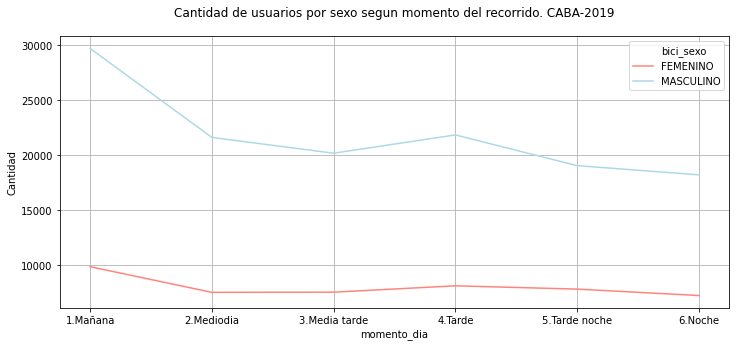

In [27]:
# ... y ploteamos
plt.figure(figsize=(12,5))
ax = sns.lineplot(x="momento_dia", y="Cantidad", hue='bici_sexo', 
                  data=sexo_dia.loc[sexo_dia['bici_sexo']!='NO INFORMADO'], palette = ['#FF847C','#ADD8E6'])
ax.set_facecolor("white")
plt.title('Cantidad de usuarios por sexo segun momento del recorrido. CABA-2019', y=1.05)
plt.grid()

Otra información que podría ser relevante sobre nuestro dataframe es la ubicación de las estaciones. No solamente por la cuestión geográfica en sí, sino también como una forma de constatar cuan completo está nuestro set de datos. Representa en su totalidad la red de bicicletas o hay información con la que no contamos? Veámoslo,

In [28]:
# Total de estaciones de origen
len(df19b.bici_nombre_estacion_origen.unique())

170

In [29]:
# Total de estaciones de destino
len(df19b.bici_nombre_estacion_destino.unique())

171

Importemos algunas de las librerías que vimos en nuestra clase de estrategias de visualización...

In [30]:
# Geolocalizacion
import geopandas as gpd
import mplleaflet

Ahora sí veamos su ubicación geográfica, para eso nos vamos a descargar el shapefile de `Estaciones de Bicicletas` disponible en [Buenos Aires Data](https://data.buenosaires.gob.ar/dataset/estaciones-bicicletas-publicas) 

In [31]:
# Shape de estaciones descargados de DataBA
estaciones = gpd.read_file('../carto/estaciones_de_bicicletas.shp')

In [32]:
# ya podemos ver una primera diferencia, tenemos más estaciones que en nuestro último df
len(estaciones.NOMBRE.unique())

199

Lo que vamos a hacer ahora es tratar de asignarle valores a cada estación. En nuestro caso, cantidad de usuarios o retiros de bicicletas...

In [33]:
# Creamos la cantidad total de retiros en origen para el año 2019
retiros_en_origen = df['19'].groupby(['bici_nombre_estacion_origen'])[['bici_sexo']].count().reset_index()

In [34]:
# ... y lo mergeamos con nuestro shape de estaciones
retiros_en_origen_map = pd.merge(estaciones,retiros_en_origen, 
                                 left_on='NOMBRE', 
                                 right_on='bici_nombre_estacion_origen')

In [35]:
# Así vemos el total de retiros de bicicletas para 2019 en estaciones de origen
fig, ax = plt.subplots(1, figsize = (8,8))
ax.set_axis_off()
retiros_en_origen_map.to_crs(4326).plot(ax=ax,marker='o', 
                                        color='#FF847C', 
                                        markersize=retiros_en_origen_map['bici_sexo']/20)

mplleaflet.display(fig=ax.figure)

/home/federico/.local/lib/python3.6/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [36]:
# Cargamos el shp radios censales de caba simplemente para tener como layer de base
caba = gpd.read_file('../carto/radios.geojson')

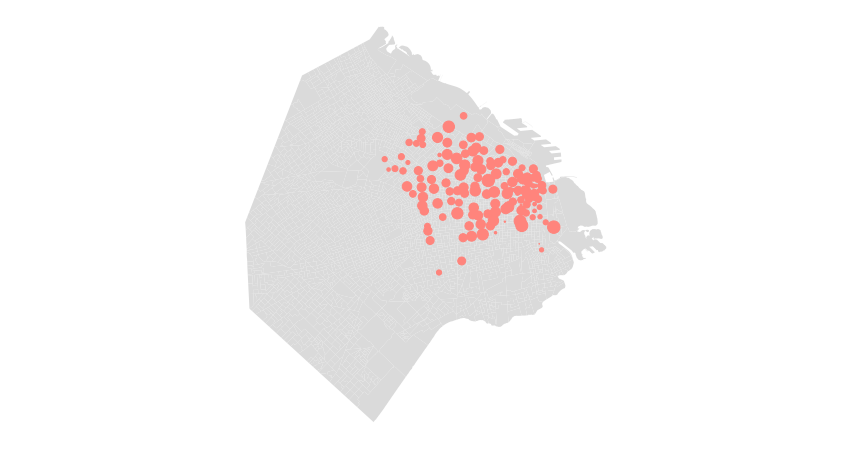

In [37]:
# una forma estática de ver lo mismo
f, ax = plt.subplots(1,figsize=(15,8))
caba.to_crs(crs=retiros_en_origen_map.crs).plot(ax=ax, color='#dadada')
retiros_en_origen_map.plot(ax=ax,marker='o', color='#FF847C', 
                           markersize=retiros_en_origen_map['bici_sexo']/20 )
plt.axis('equal')
ax.set_axis_off()

Por último, veamos si el uso de las bicicletas registra algún horario de uso intensivo. No perdamos de vista que todavía seguimos analizando nuestro datos de manera agregada. Todavía no hemos elegido un día en concreto. Esto lo hacemos como una primera aproximación, más bien general, que nos permita cierta familiaridad con nuestros datos. Algo así como tener un primer pantallazo.

Armamos entonces una con usuarios totales por hora de retiro. Esto nos va a permitir armar una `heat table` con las distintas horas del día y los retiros registrados. Para concretarlo, vamos a apelar al método `pivot_table` de pandas.

In [38]:
# Probemos con 'Horas' en el eje x para la cantidad de retiros por hora segun dia de la semana
pivot1 = pd.pivot_table(df19b,
                        values="bici_sexo",
                        index=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.weekday, 
                        columns=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.hour, 
                        aggfunc = 'count',fill_value=0)

# Y con 'Horas' en el eje y
pivot2 = pd.pivot_table(df19b, 
                        values="bici_sexo",
                        index=pd.to_datetime(df19b.bici_Fecha_hora_retiro).dt.hour, 
                        columns=["dia_semana"], 
                        aggfunc = 'count',fill_value=0)

In [39]:
# Acá se ve con claridad la matriz que armamos...
pivot1

bici_Fecha_hora_retiro    0    1    2    3    4    5    6     7     8     9   \
bici_Fecha_hora_retiro                                                         
0                        790  551  313  175  133  346  659  1199  1535  1325   
1                        917  586  319  188  166  412  811  1523  1732  1421   
2                        919  647  369  195  161  452  823  1589  2142  1739   
3                       1026  752  393  219  217  390  759  1453  1881  1634   
4                       1138  781  413  253  189  360  789  1584  1990  1534   
5                        995  820  699  476  356  357  503   706   855   909   
6                        789  704  527  374  323  362  476   434   425   372   

bici_Fecha_hora_retiro  ...    14    15    16    17    18    19    20    21  \
bici_Fecha_hora_retiro  ...                                                   
0                       ...  1859  1893  2035  2589  2836  2481  2089  1782   
1                       ...  1784  1774  1932  2101  2245  2018  1957  1662   
2                       ...  1828  1778  2144  2476  2696  2510  2145  1804   
3                       ...  1819  1857  2201  2645  3135  2620  2294  1916   
4                       ...  1581  1706  2129  2497  2659  2264  2041  1591   
5                       ...  1231  1199  1172  1079  1069  1211  1174  1064   
6                       ...   696   821   916   944   988  1059  1013   986   

bici_Fecha_hora_retiro    22    23  
bici_Fecha_hora_retiro              
0                       1249   928  
1                       1142   905  
2                       1278  1093  
3                       1406  1156  
4                       1249   944  
5                        885   776  
6                        841   794  

[7 rows x 24 columns]

In [40]:
pivot2.head()

dia_semana              domingo  jueves  lunes  martes  miercoles  sabado  \
bici_Fecha_hora_retiro                                                      
0                           789    1026    790     917        919     995   
1                           704     752    551     586        647     820   
2                           527     393    313     319        369     699   
3                           374     219    175     188        195     476   
4                           323     217    133     166        161     356   

dia_semana              viernes  
bici_Fecha_hora_retiro           
0                          1138  
1                           781  
2                           413  
3                           253  
4                           189

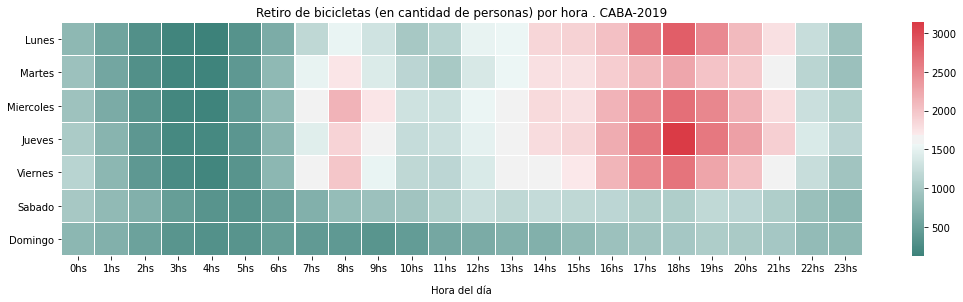

In [41]:
# Graficamos un heatmap de seaborn utilizando pivot1
plt.figure(figsize=(15,4))
ax = sns.heatmap(pivot1, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=360 )

# Eje x
ax.set_xlabel("Hora del día", labelpad = 12)
labels = [item.get_text()+''+'hs' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

# Eje y
ax.set_yticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], rotation = 360)
ax.set_ylabel("")

ax.set_title('Retiro de bicicletas (en cantidad de personas) por hora . CABA-2019', y=1.05)
plt.tight_layout()
plt.show();

In [42]:
# Hagamos lo mismo con los otros años

#2015
pivot15 = pd.pivot_table(df['15'], values="bici_sexo",
                         index=pd.to_datetime(df['15'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['15'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

#2016
pivot16 = pd.pivot_table(df['16'], values="bici_sexo",
                         index=pd.to_datetime(df['16'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['16'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

#2017
pivot17 = pd.pivot_table(df['17'], values="bici_sexo",
                         index=pd.to_datetime(df['17'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['17'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

#2018
pivot18 = pd.pivot_table(df['18'], values="bici_sexo",
                         index=pd.to_datetime(df['18'].bici_Fecha_hora_retiro).dt.hour, 
                         columns=pd.to_datetime(df['18'].bici_Fecha_hora_retiro).dt.weekday, 
                         aggfunc = 'count',fill_value=0)

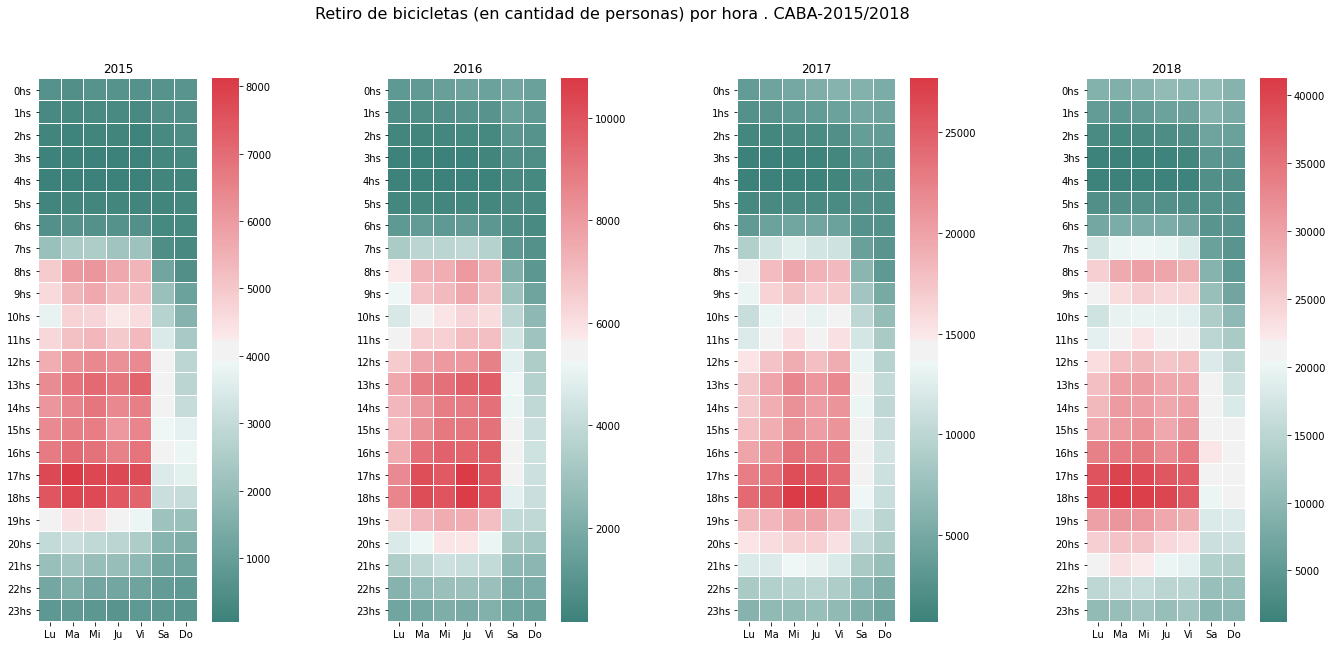

In [43]:
# Y usemoslos para graficar un heatmap con pivot2 (verticalmente!)
fig = plt.figure(figsize=(24,10))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

#2015
sns.heatmap(pivot15, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax1.set_ylabel("Hora del día", labelpad = 12)
labels1 = [item.get_text()+''+'hs' for item in ax1.get_yticklabels()]
ax1.set_yticklabels(labels,  rotation = 0)
ax1.set_ylabel("")
ax1.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax1.set_xlabel("")
ax1.set_title('2015', y=1.01)

#2016
sns.heatmap(pivot16, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax2)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=360 )
ax2.set_ylabel("Hora del día", labelpad = 12)
labels2 = [item.get_text()+''+'hs' for item in ax2.get_yticklabels()]
ax2.set_yticklabels(labels,  rotation = 0)
ax2.set_ylabel("")
ax2.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax2.set_xlabel("")
ax2.set_title('2016', y=1.01)

#2017
sns.heatmap(pivot17, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=360 )
ax3.set_ylabel("Hora del día", labelpad = 12)
labels3 = [item.get_text()+''+'hs' for item in ax3.get_yticklabels()]
ax3.set_yticklabels(labels,  rotation = 0)
ax3.set_ylabel("")
ax3.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax3.set_xlabel("")
ax3.set_title('2017', y=1.01)

#2018
sns.heatmap(pivot18, square=True, cmap=sns.diverging_palette(180, 10, as_cmap=True), linewidths=.1, ax = ax4)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=360 )
ax4.set_ylabel("Hora del día", labelpad = 12)
labels4 = [item.get_text()+''+'hs' for item in ax4.get_yticklabels()]
ax4.set_yticklabels(labels,  rotation = 0)
ax4.set_ylabel("")
ax4.set_xticklabels(['Lu','Ma','Mi','Ju','Vi','Sa','Do'], rotation = 360)
ax4.set_xlabel("")
ax4.set_title('2018', y=1.01)

fig.suptitle('Retiro de bicicletas (en cantidad de personas) por hora . CABA-2015/2018', fontsize=16) 
plt.show();

Por último, vamos a tratar de llevar este análisis a un esquema operativo un poco más integrado. Para eso, vamos a modularizar una serie de funciones que nos permitan:

1. agregarle atributos geográficos a un dataframe valiéndonos del módulo `datetime`
2. agregar nuestra información (cantidad de retiros o usuarios) por hora y estación de retiro
3. transformar nuestros datos en formato espacial 
4. filtrar nuestra información para distitntas franjas temporales y
5. graficarla dinámicamente sobre un mapa

Para llevarlo a cabo, nos valdremos de varios de los recursos que ya venimos viendo e introduciremos una herramienta bastante popular y flexible para la construcción de plots: `plotly`

In [44]:
#!pip install plotly_express (si no la instalaste!)
import plotly_express as px

Plotly dispone de varias clases muy interesantes, tanto para construir gráficos más comunes o conocidos como un scatter plot, como así también choropletas, mapas de puntos y o incluso de calor.

In [45]:
# Dataframe con valores por hora
df_scat19 = df19b.groupby(['bici_nombre_estacion_origen',
                         'hora','bici_sexo'])[['bici_edad','bici_tiempo_uso']].mean().reset_index()


# Plot
px.scatter(df_scat19.sort_values(by='hora',ascending=True), 
           x="bici_edad", y="bici_tiempo_uso", 
           animation_frame="hora", 
           animation_group="bici_nombre_estacion_origen",
           labels=dict(bici_edad="Edad promedio de usuarios", 
                       bici_tiempo_uso="Tiempo medio de uso", 
                       NOMBRE = 'Estacion', hora = 'hora', 
                       bici_sexo = 'Usuarios')
           )

En este plot, constatamos algo de lo que ya venimos hablando en este notebook. Si vemos cómo se acercan la edad y el tiempo de uso promedio hacia el final del día, podremos ver cómo la edad aumenta (oscilando en la franja de los treinta). Esto nos los muestra los promedios de edad más elevados. Te animás a ver si el mismo patrón se reproduce en algún año anterior?

Ahora sí, adentremonos a construir el flujo de trabajo que describimos más arriba. Empecemos por construir una función que devuelva un dataframe con series de tipo datetime.

In [46]:
def atributos_temporales(dict_input,key):
    """
    Agrega columnas con diferentes atributos temporales 
    en un dataframe de pandas.
    ...
    Argumentos:
     dict_input (dict): diccionario de dataframes con viajes por año.
     key (str): año
     
    Devuelve:
      pandas.dataframe : df con series de mes,fecha,hora y dia.  
    """
    
    df = dict_input[key].copy()
    df['mes'] = pd.to_datetime(df.bici_Fecha_hora_retiro).dt.month
    df['fecha'] = pd.to_datetime(df.bici_Fecha_hora_retiro).dt.date.astype('datetime64') 
    df['hora'] = pd.to_datetime(df.bici_Fecha_hora_retiro).dt.hour
    df['dia_semana'] = pd.to_datetime(df.bici_Fecha_hora_retiro).dt.weekday
    df['nombre_dia_semana'] = df['dia_semana'].replace({0:'lunes', 
                                                        1:'martes', 
                                                        2:'miercoles', 
                                                        3:'jueves', 
                                                        4:'viernes', 
                                                        5:'sabado', 
                                                        6:'domingo'})
                         
    return df


Armemos nuestro constructor de filtros...

In [47]:
def construye_filtros(df, filtro):
    """
    Filtra un dataframe de pandas a partir de 
    los atributos temporales especificados en un dict.
    ...
    Argumentos:
        filtro (dict): Diccionario con dtypes key/str, val/list (e.g: {'mes':[6,12]})
        
    Devuelve:
      pandas.dataframe : df filtrado por mes o fecha. 
    """
    
    
    for k,v in filtro.items():
        if len(v) > 1:
            print('Filtrando df por {}, entre {} y {}'.format(k,v[0],v[1]))
            df1 = df[(df[k] >= v[0]) & (df[k] <= v[1])]
            return df1

        elif len(v) == 1:
            print('Filtrando df para {} {}'.format(k,v[0]))
            df1 = df[(df[k] == v[0])]
            return df1

        else:
            print('No se aplica ningún filtro')

E integremos ambos pasos en una misma función.

In [48]:
def compila_data(dict_input,key, filtro=None):
    '''
    Asigna atributos temporales a un df y filtra casos
    en función de los mismos.
    ...
    Argumentos:
    dict_input (dict): diccionario de dataframes con viajes por año
    key (str): año (e.g. '18')
    filtro (dict): diccionario con dtypes key/str, val/list (e.g: {'mes':[6,12]})
    
    Devuelve:
      pandas.dataframe : df de viajes origen/destino para un año determinado. 
    '''
    
    df = atributos_temporales(dict_input, key)
    
    if filtro:
        df_filt = construye_filtros(df,filtro)
        return df_filt
    else:
        return df

In [49]:
len(df['18'])

2970479

Ahora, apliquemos nuestra función de compilación. Tengamos en cuenta que la misma se aplicará sobre un dataframe de alrededor de unas 3 millones de filas. Es decir, bastante grande. Instanciemos y veamos qué tiempo insume...

In [50]:
%%time
t = compila_data(dict_input=df, key='18')

CPU times: user 4.87 s, sys: 200 ms, total: 5.07 s
Wall time: 5.06 s


In [51]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970479 entries, 0 to 2970478
Data columns (total 14 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   bici_id_usuario               float64       
 1   bici_Fecha_hora_retiro        object        
 2   bici_tiempo_uso               float64       
 3   bici_nombre_estacion_origen   object        
 4   bici_estacion_origen          int64         
 5   bici_nombre_estacion_destino  object        
 6   bici_estacion_destino         float64       
 7   bici_sexo                     object        
 8   bici_edad                     float64       
 9   mes                           int64         
 10  fecha                         datetime64[ns]
 11  hora                          int64         
 12  dia_semana                    int64         
 13  nombre_dia_semana             object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 317.3+ MB


In [52]:
t.head()

bici_id_usuario bici_Fecha_hora_retiro  bici_tiempo_uso  \
0         107148.0    2018-12-31 23:56:42             39.0   
1         140759.0    2018-12-31 23:40:14              7.0   
2         391310.0    2018-12-31 23:31:39              2.0   
3         487229.0    2018-12-31 23:27:19             31.0   
4         192675.0    2018-12-31 23:22:29             21.0   

  bici_nombre_estacion_origen  bici_estacion_origen  \
0               Parque Lezama                     6   
1   Cementerio de la Recoleta                   166   
2                      Agüero                    85   
3           Ministro Carranza                    58   
4                       Pasco                    91   

  bici_nombre_estacion_destino  bici_estacion_destino  bici_sexo  bici_edad  \
0             Austria y French                  200.0  MASCULINO       27.0   
1                     Quintana                  115.0   FEMENINO       65.0   
2                      Ecuador                   69.0  MASCULINO       24.0   
3                      Sarandí                   77.0  MASCULINO       21.0   
4                       Rincón                  106.0   FEMENINO       32.0   

   mes      fecha  hora  dia_semana nombre_dia_semana  
0   12 2018-12-31    23           0             lunes  
1   12 2018-12-31    23           0             lunes  
2   12 2018-12-31    23           0             lunes  
3   12 2018-12-31    23           0             lunes  
4   12 2018-12-31    23           0             lunes

In [53]:
# revisemos si el dataframe sin filtros tiene la misma extensión que el original
len(t) == len(df['18'])

True

Nuestra función consume un `wall time` (esto es, el tiempo que un reloj de pared indicaría desde que ejecutamos la orden) de  4.65 segundos. Veamos ahora cuan costoso resulta aplicar nuestros filtros.

In [54]:
%%time
t1 = compila_data(dict_input=df, key='18', filtro={'mes':[12]})

Filtrando df para mes 12
CPU times: user 4.8 s, sys: 277 ms, total: 5.07 s
Wall time: 5.07 s


In [55]:
# filtrando para el mes de diciembre, vemos que la cantidad de casos es menor. Algo esperable...

Por último, veamos un filtro un poco más complejo.

In [56]:
%%time
t2 = compila_data(dict_input=df, key='18', filtro={'mes':[6,12]})

Filtrando df por mes, entre 6 y 12
CPU times: user 4.99 s, sys: 296 ms, total: 5.29 s
Wall time: 5.28 s


Sabemos entonces que en un dataframe de las características del nuestro, el compilador puede llegar a tardar hasta unos 5 segundos aproximadamente. Este último filtro nos sirve para seleccionar la cantidad de casos con un criterio de rango. Es decir, si la lista que nosotros pasamos en el parámetro contiene más de un elemento, esto será interpretado como que el primero de ellos es el límite inferior y el segundo el superior.

In [57]:
len(t2)

2074652

In [58]:
# al pasarle una lista con 6 y 12, nuestros datos corresponderan a los meses que se encuentran entre ambos límites 
t2.mes.unique()

array([12, 11, 10,  9,  8,  7,  6])

In [59]:
t3 = compila_data(dict_input=df, key='18',filtro={'fecha':['2018-12-31']})

Filtrando df para fecha 2018-12-31


In [60]:
len(t3)

1612

In [61]:
# acá filtramos entre los días 24 y 31 del mes de diciembre
t4 = compila_data(dict_input=df, key='18',filtro={'fecha':['2018-12-24','2018-12-31']})

Filtrando df por fecha, entre 2018-12-24 y 2018-12-31


In [62]:
len(t4)

25981

Utilicemos el compilador que construimos como herramienta para visualizar la cantidad de usuarios o retiros de bicicleta en distintas franjas temporales. La idea del flujo de trabajo que venimos constuyendo, es que nos provea el insumo necesario para reconstruir un patrón territorial que refleje la intensidad de uso del servicio. 

Por eso, una vez que construimos nuestro dataframe, debemos convertirlo a un formato geográfico que nos permita representarlo espacialmente. Retomemos algunos de los conceptos que vimos en las clases iniciales. Convirtamos nuestro dataframe en geodataframe:

In [63]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [64]:
def construye_gdf(data, gdf_coord):
    '''
    Transforma el df de viajes origen/destino en un df de cantidad de usuarios/retiros de bicicletas
    por estación y hora. Convierte el df resultante en geodataframe..
    ...
    Argumentos:
    data (df): df de viajes origen/destino
    gdf_coord (gdf): gdf con las coordenadas de referencia.
    
    Devuelve:
      geopandas.geodataframe : gdf de retiros por estación y hora. 
    '''
    
    info = data.groupby(['bici_nombre_estacion_origen','hora'])['bici_sexo'].count().reset_index()
    marker = gdf_coord.to_crs(epsg=4326)
    gdf = pd.merge(marker,info, right_on='bici_nombre_estacion_origen', left_on='NOMBRE')
    
    gdf['x'], gdf['y'] = gdf.geometry.x, gdf.geometry.y
    
    gb = gdf.groupby(['NOMBRE', 'x', 'y','hora']).sum()
    geometry = [Point(xy) for xy in zip(gb.reset_index().x, gb.reset_index().y)]
    info_estaciones = gb.reset_index().drop(['x', 'y'], axis=1)
    info_estaciones_geo = GeoDataFrame(info_estaciones, crs="EPSG:4326", geometry=geometry)
    
    info_estaciones_geo['usuarios'] = info_estaciones_geo["bici_sexo"]
    
    return info_estaciones_geo

In [65]:
t1.columns

Index(['bici_id_usuario', 'bici_Fecha_hora_retiro', 'bici_tiempo_uso',
       'bici_nombre_estacion_origen', 'bici_estacion_origen',
       'bici_nombre_estacion_destino', 'bici_estacion_destino', 'bici_sexo',
       'bici_edad', 'mes', 'fecha', 'hora', 'dia_semana', 'nombre_dia_semana'],
      dtype='object')

In [66]:
t1_map = construye_gdf(t1, estaciones)

In [67]:
def mapa_estaciones(gdf, fecha):
    '''
    Plotea la cantidad de retiros de bicicletas por estación y hora
    para un período de tiempo determinado.
    ...
    Argumentos:
    gdf(gdf): GeoDataFrame.
    fecha(str): Título del plot.
    
    Devuelve:
      geopandas.geodataframe : gdf de retiros por estación y hora. 
    '''
    
    fig = px.scatter_mapbox(gdf, 
                            lat=gdf.geometry.y,lon=gdf.geometry.x,
                            hover_name="NOMBRE",                        
                            animation_frame="hora",
                            size="usuarios",
                            color_discrete_sequence=['#F05E23'],
                            opacity=0.9,
                            zoom=11, 
                            height=600)
    
    fig.update_layout(mapbox_style="carto-darkmatter",
                      title_text = 'Usuarios/Retiros de bicicletas por estacion<br>({})'.format(fecha),
                      showlegend = True)

    fig.update_layout(margin={"r":1,"t":75,"l":0,"b":0})
    fig.show()

In [68]:
# veamos cómo queda nuestro mapa con alguno de los filtros
mapa_estaciones(t1_map, 'Diciembre 2018')

In [69]:
t4_map = construye_gdf(t4, estaciones)

In [70]:
# como son menos casos, ordenamos la columna de horas para asegurarnos que el eje x se vea ordenado 
mapa_estaciones(t4_map.sort_values(by='hora'), "21 a 31 de diciembre 2018")

Y aquí, nuestro resultado final. Optimizando un poco más esta herramienta, podríamos monitorear la cantidad de retiros e identificar, por hora, cuáles son las zonas con mayor demanda. 